In [ ]:
using Turing, Distributions
using PyPlot, PyCall

In [ ]:
y1 = 10*sin(0:0.2:2pi); y1 += randn(length(y1))
y2 = 10*sin(0:0.2:2pi); y2 += randn(length(y2))
y = [y1'; y2']
N = size(y)[end];  K = 10;

In [ ]:
@model FHMM(y) = begin
    s1 = tzeros(Int, N)
    s2 = tzeros(Int, N)
    m1 = tzeros(Real, K)
    m2 = tzeros(Real, K)
    T1 = Vector{Vector{Real}}(K)
    T2 = Vector{Vector{Real}}(K)
    for i = 1:K
        T1[i] ~ Dirichlet(ones(K)/K)
        T2[i] ~ Dirichlet(ones(K)/K)
        m1[i] ~ Normal(i, 1)
        m2[i] ~ Normal(i, 1)
    end
    s1[1] ~ Categorical(ones(Float64, K)/K)
    s2[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s1[i] ~ Categorical(vec(T1[s1[i-1]]))
        s2[i] ~ Categorical(vec(T2[s2[i-1]]))
        y[:,i] ~ MvNormal([m1[s1[i]], m2[s2[i]]], 1*ones(2))
    end
end

In [ ]:
g = Gibbs(300, HMC(1, 0.2, 5, :m1, :T1, :m2, :T2), PG(25, 1, :s1, :s2); thin=false)
c = sample(FHMM(y), g);

In [13]:
describe(c)

Iterations = 1:600
Thinning interval = 1
Chains = 1
Samples per chain = 600

Empirical Posterior Estimates:
                        Mean                         SD                     Naive SE                    MCSE                ESS    
     m1[4]     6.16382606835574620163243  0.7199522380598153414866 0.02939192704035517231254 0.062106796655710276577889 134.3782907
    s1[14]     6.76499999999999968025577  3.9389890061602206294822 0.16080855279208608465957 1.572394670558254103909235   6.2754722
     s1[7]     6.99000000000000021316282  0.2449489742783195478371 0.01000000000000007133183 0.009999999999999936023398 600.0000000
  T1[6][1]     0.07353008031114735554290  0.1391497413797281590409 0.00568076440367626823297 0.026232243240790490551584  28.1380467
  T1[6][2]     0.13200309480463290334740  0.2413284261903854699405 0.00985219174325594089503 0.084459719663119700583387   8.1642762
  T1[6][3]     0.12691393751436599868221  0.2301059134396839789272 0.00939403457873766271902 0.07648

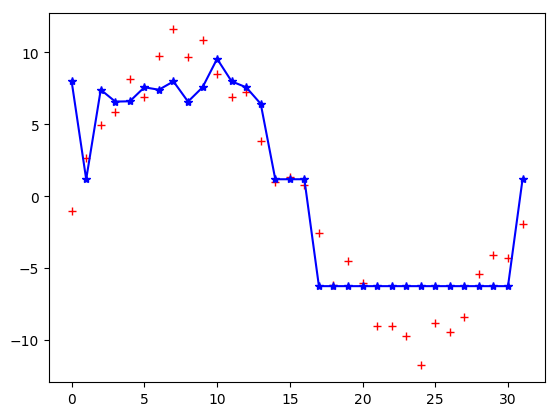

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31439ac90>

In [12]:
m1 = c[:m1][222];
s1 = c[:s1][222];
PyPlot.plot(y[1,:], linestyle="None", marker="+", color = "r")
PyPlot.plot(m1[s1], linestyle="-", marker="*", color = "b")